In [1]:
import numpy as np # importing numpy for numerical computation
from sklearn.datasets import load_boston # here we are using sklearn's boston dataset
from sklearn.metrics import mean_squared_error # importing mean_squared_error metric

In [2]:
boston = load_boston()
x=boston.data #independent variables
y=boston.target #target variable

In [ ]:
# np.random.choice(x.shape[0],303)

In [ ]:
# x1 = x[np.random.choice(x.shape[0],303)]

In [ ]:
# x1.shape

In [ ]:
# x2 = x1[np.random.choice(x1.shape[0],203)]

In [ ]:
# np.random.choice(13,np.random.randint(3,13),replace=False)

# <font color='red'><b>Bootstrap assignment</b> </font>

<b>There will be some functions that start with the word "grader" ex: grader_sampples(), grader_30().. etc, you should not change those function definition.

Every Grader function has to return True.</b>

<font color='blue'> <b>Importing packages</b> </font>

In [3]:
import numpy as np # importing numpy for numerical computation
from sklearn.datasets import load_boston # here we are using sklearn's boston dataset
from sklearn.metrics import mean_squared_error # importing mean_squared_error metric
from sklearn.tree import DecisionTreeRegressor

In [4]:
boston = load_boston()
x=boston.data #independent variables
y=boston.target #target variable

In [ ]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [ ]:
x.shape

(506, 13)

In [ ]:
x[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

## <font color='red'><b>Task 1</b></font>

<font color='red'> <b>Step - 1</b></font>

*  <font color='blue'><b>Creating samples</b></font><br>
    <b> Randomly create 30 samples from the whole boston data points</b>
    *  Creating each sample: Consider any random 303(60% of 506) data points from whole data set and then replicate any 203 points from the sampled points
    
     For better understanding of this procedure lets check this examples, assume we have 10 data points [1,2,3,4,5,6,7,8,9,10], first we take 6 data points randomly , consider we have selected [4, 5, 7, 8, 9, 3] now we will replicate 4 points from [4, 5, 7, 8, 9, 3], consder they are [5, 8, 3,7] so our final sample will be [4, 5, 7, 8, 9, 3, 5, 8, 3,7]
* <font color='blue'><b> Create 30 samples </b></font>
    *  Note that as a part of the Bagging when you are taking the random samples <b>make sure each of the sample will have different set of columns</b><br>
Ex: Assume we have 10 columns[1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10] for the first sample we will select [3, 4, 5, 9, 1, 2] and for the second sample  [7, 9, 1, 4, 5, 6, 2] and so on...
Make sure each sample will have atleast 3 feautres/columns/attributes

<font color='red'><b>Step - 2 </b></font>

<font color='blue'><b>Building High Variance Models on each of the sample and finding train MSE value</b></font>

*  Build a regression trees on each of 30 samples.
*  Computed the predicted values of each data point(506 data points) in your corpus.
*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{30}\sum_{k=1}^{30}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$
*  Now calculate the $MSE =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$

<font color='red'> <b>Step - 3 </b></font>

*  <font color='blue'><b>Calculating the OOB score </b></font>

*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{k}\sum_{\text{k= model which was buit on samples not included } x^{i}}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$.
*  Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

# <font color='red'><b>Task 2</b></font>

*  <font color='blue'><b>Computing CI of OOB Score and Train MSE</b></font>
  *   Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> you need to report CI of MSE and CI of OOB Score </li>
<li> Note: Refer the Central_Limit_theorem.ipynb to check how to find the confidence intravel</li>
</ol>

# <font color='red'><b>Task 3</b></font>

*  <font color='blue'><b>Given a single query point predict the price of house.</b></font>

Consider xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60] 
Predict the house price for this point as mentioned in the step 2 of Task 1.

<br><br><br>

# <font color='blue'> <b>Task - 1</b></font>

<font color='blue'><b>Step - 1</b></font>

*  <font color='blue'> <b>Creating samples</b></font>

<font color='Orange'><b>Algorithm</b></font>

![alt text](https://i.imgur.com/BTVYXQ1.jpg/)

*  <font color='blue'><b> Write code for generating samples</b></font>

In [10]:
def generating_samples(input_data, target_data):

    '''In this function, we will write code for generating 30 samples '''
    # you can use random.choice to generate random indices without replacement
    # Please have a look at this link https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.choice.html for more details
    # Please follow above pseudo code for generating samples 
    selecting_rows = np.random.choice(len(input_data),303,replace=False)
    # replacing_rows = np.random.choice(len(selecting_rows),203)#,replace=False)
    replacing_rows = np.random.choice(selecting_rows,203)
    selecting_columns = np.random.choice(13,np.random.randint(3,13),replace=False)
    sample_data = input_data[selecting_rows[:,None],selecting_columns]
    target_sample_Data = target_data[selecting_rows]

    # replicate_sample_data = sample_data[replacing_rows]
    replicate_sample_data = input_data[replacing_rows[:,None],selecting_columns]
    target_replicate_sample_data = target_data[replacing_rows]

    final_sample_data = np.vstack((sample_data,replicate_sample_data))
    final_target_data = np.vstack((target_sample_Data.reshape(-1,1),target_replicate_sample_data.reshape(-1,1)))

    # print(len(selecting_columns),len(selecting_rows))
    # print(len(sample_data),len(replicate_sample_data))
    # print(len(final_sample_data),len(final_target_data))
    return final_sample_data , final_target_data,selecting_rows,selecting_columns
    #note please return as lists

<font color='cyan'> <b> Grader function - 1 </b> </fongt>

In [11]:
def grader_samples(a,b,c,d):
    length = (len(a)==506  and len(b)==506)
    sampled = (len(a)-len(set([str(i) for i in a]))==203)
    rows_length = (len(c)==303)
    column_length= (len(d)>=3)
    assert(length and sampled and rows_length and column_length)
    return True
a,b,c,d = generating_samples(x, y)
grader_samples(a,b,c,d)

True

*  <font color='blue'> <b>Create 30 samples </b>

![alt text](https://i.imgur.com/p8eZaWL.jpg)

In [12]:
# Use generating_samples function to create 30 samples 
# store these created samples in a list
# Also storing the corresponding rows/columns number for each sample
list_input_data =[]
list_output_data =[]
list_selected_row= []
list_selected_columns=[]

for i in range(30):
  a,b,c,d = generating_samples(x,y)
  list_input_data.append(a)
  list_output_data.append(b)
  list_selected_row.append(c)
  list_selected_columns.append(d)

<font color='cyan'> <b>Grader function - 2 </b></font>

In [13]:
def grader_30(a):
    assert(len(a)==30 and len(a[0])==506)
    return True
grader_30(list_input_data)

True

<br>

<font color='red'><b>Step - 2 </b></font>

<font color='orange'><b>Flowchart for building tree</b></font>

![alt text](https://i.imgur.com/pcXfSmp.png)

*  <font color='blue'><b> Write code for building regression trees</b></font>

In [14]:
models = []
for i in range(30):
  model = 'model' + str(i)
  model = DecisionTreeRegressor(max_depth=None,random_state=10)
  model.fit(list_input_data[i],list_output_data[i])
  models.append(model)

<font color='orange'><b>Flowchart for calculating MSE </b></font>

![alt text](https://i.imgur.com/sPEE618.png)

After getting predicted_y for each data point, we can use sklearns mean_squared_error to calculate the MSE between predicted_y and actual_y.

*  <font color='blue'><b> Write code for calculating MSE</b></font>

In [ ]:
len(x)

506

In [15]:
def mse():
  
    # global y_pred
    y_pred = []
    for j in range(len(x)):                                                         # Looping over all 506 data points
      y_pred_temp = []
      for i in range(len(models)):                                                  # Looping over all models
        # models[j].predict(x[i,list_selected_columns[j]].reshape(1,-1))
          y1 = models[i].predict([x[j,list_selected_columns[i]]])                   # Predicting the yi for ith model and considering only respective columns on which the model was trained
        # y_pred_temp.append(y)
          y_pred_temp.append(y1)
      y_pred.append(np.median(y_pred_temp))                                         # Getting the median of predicted vales of all models

    # print(y_pred)
    return mean_squared_error(y,y_pred)                                             # Finally returning the Mean square error


In [16]:
# y_pred = []
print(mse())

0.11181008454106292


In [17]:
y[:20]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2])

<font color='blue'><b>Step - 3 </b></font>

<font color='orange'><b>Flowchart for calculating OOB score</b></font>

![alt text](https://i.imgur.com/95S5Mtm.png)

Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

*  <font color='blue'><b> Write code for calculating OOB score </b></font>

In [18]:
def oob():
#   f_models = []
#   for i in range(len(x)):
#     ref = []
#     for j in range(len(list_selected_row)):                                     

#       if i not in list_selected_row[j]:                                         # getting the models where the data point is not in train set
#         ref.append(j)
#     f_models.append(ref)

  y_oob = []
#   for i in range(len(f_models)):
  for i in range(len(x)):                                                       
    y_oob_model = []
    # for j in range(len(f_models[i])):
    for j in range(len(models)):
      if i not in list_selected_row[j]:
        y_temp = models[j].predict(x[i,list_selected_columns[j]].reshape(1,-1))   # for every data point not included in model train, rest models are used to predict the output
        y_oob_model.append(y_temp)
    y_oob.append(y_oob_model)

  y_pred_oob = []
  for i in y_oob:
    y_pred_oob.append(np.median(i))                                             # getting the median y of predicted y's using oob models

  return mean_squared_error(y,y_pred_oob)                                       # returning the oob mse

In [19]:
print(oob())

14.690624514000312


In [ ]:
# l = []
# for i in range(506):
#     if i not in list_selected_row[0]:
#         l.append(i)

In [20]:
# len(l)

In [ ]:
#   f_models = []
#   for i in range(len(x)):
#     ref = []
#     for j in range(len(list_selected_row)):

#       if i not in list_selected_row[j]:
#         ref.append(j)
#     f_models.append(ref)

In [ ]:
# f_models

# <font color='blue'><b>Task 2</b></font>

In [22]:
from tqdm import tqdm

In [23]:
mse_2 = []
oob_2 = []
for k in tqdm(range(35)):
  list_input_data =[]
  list_output_data =[]
  list_selected_row= []
  list_selected_columns=[]
  models = []

  for i in range(30):
    a,b,c,d = generating_samples(x,y)
    list_input_data.append(a)
    list_output_data.append(b)
    list_selected_row.append(c)
    list_selected_columns.append(d)
   
    model = 'model' + str(i)
    model = DecisionTreeRegressor(max_depth=None,random_state=10)
    model.fit(list_input_data[i],list_output_data[i])
    models.append(model)
  mse_2.append(mse())
  oob_2.append(oob())


100%|██████████| 35/35 [00:56<00:00,  1.60s/it]


#Confidence interval

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(0.5, 0, 'OOB value')

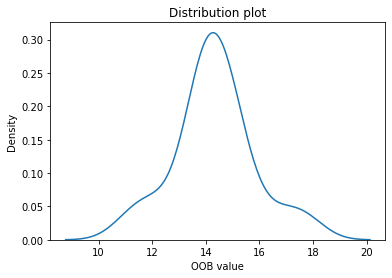

In [28]:
sns.kdeplot(oob_2)
plt.title('Distribution plot')
plt.xlabel('OOB value')

In [29]:
mse_2 = np.array(mse_2)

In [30]:
mse_mean = np.array(mse_2).mean()

In [31]:
mse_std  = np.std(mse_2)

In [32]:
ci_mse_low = mse_mean - 2*mse_std*(1/np.sqrt(len(mse_2)))

In [33]:
ci_mse_high = mse_mean + 2*mse_std*(1/np.sqrt(len(mse_2)))

In [34]:
print((ci_mse_low,ci_mse_high))

(0.061500566831672376, 0.11690137328453803)


In [35]:
oob_2 = np.array(oob_2)

In [36]:
oob_mean = np.array(oob_2).mean()

In [37]:
oob_std  = np.std(oob_2)

In [38]:
ci_oob_low = oob_mean - 2*oob_std*(1/np.sqrt(len(oob_2)))

In [39]:
ci_oob_high = oob_mean + 2*oob_std*(1/np.sqrt(len(oob_2)))

In [40]:
print(ci_oob_low,ci_oob_high)

13.818486225056223 14.810428033909258


# <font color='blue'><b>Task 3</b></font>

<font color='orange'><b>Flowchart for Task 3</b></font>

<b>Hint: </b> We created 30 models by using 30 samples in TASK-1. Here, we need send query point "xq"  to 30 models and perform the regression on the output generated by 30 models.

![alt text](https://i.imgur.com/Y5cNhQk.png)

*  <font color='blue'><b> Write code for TASK 3 </b></font>

In [41]:
xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60]

x_q = np.asarray(xq)

In [42]:
y_q = []
for i in range(len(models)):
    y_te = models[i].predict(x_q[list_selected_columns[i]].reshape(1,-1))
    y_q.append(y)
print(np.median(np.asarray(y_q)))

21.2


<br><br><br>

<font color='red'><b>Write observations for task 1, task 2, task 3 indetail</b></font>

* As mentioned in the instructions, we have written logic inside the mentioned functions to construct a RF from scratch
* Also, every grader function returns True to confirm we've implemented the solution as expected
* As part of task 1, we created different samples by bootstaping method. And 30 models were built to predict the output a point. 
* Finally we aggregated the result and took the median of all the results, hence giving a robust output.
* In task 2, we calculated the CI of OOB score and MSE. On plotting the distribution of OOB score, it's more or less a normal distribution except for the tails. Hence we assumed the disb to be normal and calculated the 2nd std deviations to either sides of the mean.
* In task 3, we were given a query point xq and was asked to predict the output based on the RF model we've constructed. Upon doing so, the output was 21.2 which seems to be a good result, considering the y_true values, and not too erronous for a given input.